In [1]:
spark

In [2]:
import datetime

# spark imports
from pyspark.sql.types import StructType, TimestampType, DoubleType, LongType
from pyspark.sql.functions import udf

# importing pixiedust and df_profiling
import pixiedust
import spark_df_profiling

pixiedust.enableJobMonitor()  # monitor job progress

def eth_schema():
    return StructType() \
        .add('epoch', LongType()) \
        .add('usd', DoubleType())

parse_timestamp_udf = udf(lambda ts: datetime.datetime.fromtimestamp(ts), TimestampType())

Pixiedust database opened successfully
Table VERSION_TRACKER created successfully


Pixiedust runtime updated. Please restart kernel
Table SPARK_PACKAGES created successfully
Table USER_PREFERENCES created successfully
Table service_connections created successfully


/opt/conda/lib/python3.5/site-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


Succesfully enabled Spark Job Progress Monitor


Exception in thread Thread-5:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/opt/conda/lib/python3.5/threading.py", line 862, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/conda/lib/python3.5/site-packages/pixiedust/utils/sparkJobProgressMonitor.py", line 47, in startSparkJobProgressMonitor
    progressMonitor = SparkJobProgressMonitor()
  File "/opt/conda/lib/python3.5/site-packages/pixiedust/utils/sparkJobProgressMonitor.py", line 174, in __init__
    self.addSparkListener()
  File "/opt/conda/lib/python3.5/site-packages/pixiedust/utils/sparkJobProgressMonitor.py", line 203, in addSparkListener
    _env.getTemplate("sparkJobProgressMonitor/addSparkListener.scala").render()
  File "/opt/conda/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2115, in run_cell_magic
    result = fn(magic_arg_s, cell)
  File "<decorator-gen-123>", line 2, in scala
  File "/opt/

## Example Using Dataframe Profiling Tool 

In [3]:
ether_df = spark.read \
    .csv('/usr/notebooks/data/etherprice.csv', sep=';', header='false', schema=eth_schema()) \
    .withColumn('date', parse_timestamp_udf('epoch')) \
    .cache()  # caching dataframe for more efficient df_profiling (multiple passes)

# display the profiling report directly in the notebook
spark_df_profiling.ProfileReport(ether_df)

# to generate a HTML report file, save the ProfileReport to an object and use the .to_file() method:
# profile = spark_df_profiling.ProfileReport(df_spark)
# profile.to_file(outputfile="/tmp/myoutputfile.html"

Number of variables,3
Number of observations,731
Total Missing (%),0.0%
Total size in memory,0.0 B
Average record size in memory,0.0 B
Numeric,2
Categorical,0
Date,1
Text (Unique),0
Rejected,0
Distinct count,731


## Example using PixieDust Display utitlity 


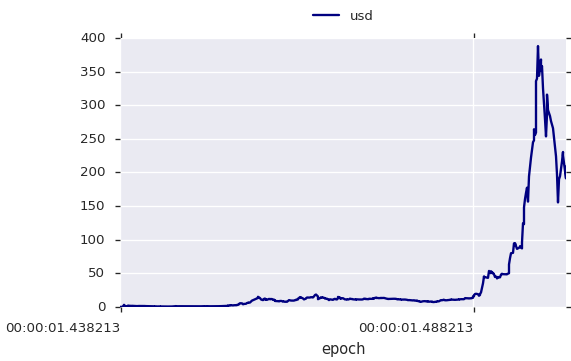

In [4]:
display(ether_df)

In [5]:
%pixiedustLog -l debug

2017-07-30 14:24:37,665 - pixiedust.utils.storage - INFO - Change in version detected: None -> 1.0.5.
2017-07-30 14:25:06,405 - pixiedust.display.chart - WARNING - Unable to import renderer seaborn: No module named 'seaborn'
2017-07-30 14:25:15,896 - pixiedust.utils.scalaBridge.PixiedustScalaMagics - DEBUG - Calling scala compiler with command: /root/scala/scala-2.11.8/bin/scalac -classpath /root/pixiedust/data/libs/*:/root/spark/spark-2.1.0-bin-hadoop2.7/conf/:/root/spark/spark-2.1.0-bin-hadoop2.7/jars/commons-dbcp-1.4.jar:/root/spark/spark-2.1.0-bin-hadoop2.7/jars/spark-repl_2.11-2.1.0.jar:/root/spark/spark-2.1.0-bin-hadoop2.7/jars/lz4-1.3.0.jar:/root/spark/spark-2.1.0-bin-hadoop2.7/jars/jersey-common-2.22.2.jar:/root/spark/spark-2.1.0-bin-hadoop2.7/jars/metrics-jvm-3.1.2.jar:/root/spark/spark-2.1.0-bin-hadoop2.7/jars/jta-1.1.jar:/root/spark/spark-2.1.0-bin-hadoop2.7/jars/opencsv-2.3.jar:/root/spark/spark-2.1.0-bin-hadoop2.7/jars/xbean-asm5-shaded-4.4.jar:/root/spark/spark-2.1.0-bin-